# Yellow-billed Cuckoo Test

The following code can be edited with your notebook's name and run in command line in order to generate output without the input code:

jupyter nbconvert --to html --TemplateExporter.exclude_input=True --output-dir="T:/Temp/" DEV_TEMPLATE.ipynb

In [1]:
# Specify some paths and names in the cell below.
config_path = "T:/Data/"  # Path to folder where you saved your wildlifeconfig file.
filter_set_json = None
taxon_json = None
query_name = 'YBCU_TEST'
ask_eBird = True
ask_GBIF = True

In [2]:
# Nothing to fill out in the next cell
%matplotlib inline
import os
import sqlite3
import pprint
import json
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import sys
sys.path.append(config_path)
import wranglerconfig as config
sys.path.append(config.codeDir)
import wrangler_functions as functions

# Define some variables
t1 = datetime.now()
working_directory = config.workDir
username = config.gbif_username
password = config.gbif_password
email = config.gbif_email
EBD_file = config.EBD_file
output_database = working_directory + query_name + '.sqlite'

# Set display options
pd.set_option('display.width', 600)
pd.set_option('display.max_colwidth', 80)
pd.set_option('display.max_rows', 150)

print("Notebook run " + str(t1))
print("Results were saved in " + output_database)

Notebook run 2021-04-27 17:57:26.664629
Results were saved in T:/Occurrence_Records/YBCU_TEST.sqlite


## Taxon Concept
GBIF and eBird can currently be accessed.

Caution! -- Taxon concept mismatches can cause inclusion of innapropriate records or ommission of useful records.

In [3]:
your_taxon_id = "TestCuckoo"
gbif_id = 2496287 
ebird_id = "Yellow-billed Cuckoo"
detection_distance_m = 200
taxon_polygon = None#"POLYGON ((-84.09680233298448 36.69265225442667, -84.07962135716329 34.5561660300382, -84.07962135716329 34.5561660300382, -80.25685423694925 34.65515526072436, -81.15026497965096 36.71331438415306, -84.09680233298448 36.69265225442667))"

In [4]:
# If a json was provided, use it, otherwise create a new one with info that was provided.
if taxon_json is None:
    # Build a species dictionary
    taxon_info = {"ID": your_taxon_id, "GBIF_ID": gbif_id, "EBIRD_ID": ebird_id, "detection_distance_m": detection_distance_m,
                  "TAXON_EOO": taxon_polygon}

    # Save as json object
    out_file = open(working_directory + your_taxon_id + ".json", "w")  
    json.dump(taxon_info, out_file) 
    out_file.close() 

if taxon_json is not None:
    with open(taxon_json, "r") as f:
        taxon_info = json.load(f)
        f.close()
        
pprint.pprint(taxon_info)

{'EBIRD_ID': 'Yellow-billed Cuckoo',
 'GBIF_ID': 2496287,
 'ID': 'TestCuckoo',
 'TAXON_EOO': None,
 'detection_distance_m': 200}


## Filter Set
Fill out this section to specify how you want records filtered and cleaned.  Alternatively, you can load a filter set here by specifying a path in the first cell of this notebook.  

To skip a filter, enter "None" without the quotation marks or "".  

#### GBIF Request Method
Whether to get records from GBIF in a darwin core archive.  "False" uses the GBIF API, which has limitations that may be important.  "True" requests results be emailed in a darwin core archive.

In [5]:
get_dwca = True 
print("Request a Darwin Core Archive? " + str(get_dwca))

Request a Darwin Core Archive? True


In [6]:
filter_set_name = "test_filters_1"
print("Name: " + str(filter_set_name))

Name: test_filters_1


#### Date Limits
Enter year and month ranges.  For example, years_range = 2015,2017 and months_range = 3,6

Justification: 

In [7]:
years_range = "2011,2020"
months_range = "6,8"
print("Years: " + str(years_range))
print("Months: " + str(months_range))

Years: 2011,2020
Months: 6,8


#### Country
Notes:

In [8]:
country = "US"
print("Country: " + country)

Country: US


#### Bounding Box
Coordinates should correspond to WGS84 (EPSG:4326).  Don't use this option if you specify a query polygon below.

Notes:

In [9]:
lat_range = "30,35"
lon_range = "-89,-75"
print("Latitude range: " + lat_range)
print("Longitude range: " + lon_range)

Latitude range: 30,35
Longitude range: -89,-75


#### Area of Interest
Specify polygons to use for spatial filtering.  Records with coordinates outside of the polygons will be removed.  You can specify a geometry for the query and one for the species.  The species geometry is included to facilitate better handling of taxonomic issues.  If both are provided, the intersection is calculated and used as the filter.  The format should be well known text in WGS84 (EPSG 4326), and very importantly, vertices need to be listed counter-clockwise.  See the ccw_wkt_from_shp() function in wrangler functions for help.

Notes:

In [10]:
query_polygon = None#"POLYGON ((-82.74809573102132 36.96082629937069, -85.0932989306133 35.63154639485496, -81.0987220521874 33.56697226279766, -79.4235769096217 36.34054727735634, -79.4235769096217 36.34054727735634, -82.74809573102132 36.96082629937069))"
print(query_polygon)

None


#### Taxon EOO
True or False whether you want to apply the taxon EOO to the filtering.  If True, removes records with centroids outside of the extent of occurrence geometry you provided in taxon_info.

Notes:

In [11]:
use_taxon_geometry = False
print("Use taxon extent of occurrence? " + str(use_taxon_geometry))

Use taxon extent of occurrence? False


#### Geoissue
Are GBIF records with noted geoissues OK to include? GBIF only.

Notes:

In [12]:
geoissue = None
print("Records with geoissues OK? " + str(geoissue))

Records with geoissues OK? None


#### Collections
List collection codes that you'd like to omit. GBIF only.

Notes:

In [13]:
collection_codes_omit = None
print("Omit: " + str(collection_codes_omit))

Omit: None


#### Institutions
List institution codes that you'd like to omit. GBIF only

Notes:

In [14]:
institutions_omit = None
print("Omit: " + str(institutions_omit))

Omit: None


#### Datasets
List datasets that you'd like to omit.

Notes:

In [15]:
datasets_omit = None
print("Omit: " + str(datasets_omit))

Omit: None


#### Coordinate Uncertainty
Do you want to remove records without coordinate uncertainty (1) or leave them in the data set (0)?  Note that eBird records in GBIF (EOD) do not have this and neither do data in the EBD dataset.  With the EBD, the length of traveling counts is used as a surrogate value.  

max_coordinate_uncertainty must be an integer greater than 0.

default_coordUncertainty -- coordinateUncertaintyInMeters is often not provided.  Here is an option to use a default.  If you don't want anything entered, set this equal to False (boolean, not string).

A maximum for coordinate uncertainty can also be set in meters.

Notes:

In [16]:
has_coordinate_uncertainty = False
default_coordUncertainty = 1000
max_coordinate_uncertainty = 10000
print("Coordinate uncertainty required? " + str(has_coordinate_uncertainty))
print("Default coordinate uncertainty to use: " + str(default_coordUncertainty))
print("Maximum allowable coordinate uncertainty: " + str(max_coordinate_uncertainty))

Coordinate uncertainty required? False
Default coordinate uncertainty to use: 1000
Maximum allowable coordinate uncertainty: 10000


#### Bases
List bases of records that you want to omit.  GBIF only.

Notes:

In [17]:
bases_omit = None
print("Omit: " + str(bases_omit))

Omit: None


#### Sampling Protocols
List sampling protocols that you would like to omit.

Notes:

In [18]:
sampling_protocols_omit = None
print("Omit: " + str(sampling_protocols_omit))

Omit: None


#### Issues
List issues that you want to omit.  GBIF only.

Notes:

In [19]:
issues_omit = None
print("Omit: " + str(issues_omit))

Omit: None


#### Duplicates
Specify whether duplicates on latitude, longitude, and date should be included.

Notes:

In [20]:
duplicates_OK = True
print("Allow duplicates? " + str(duplicates_OK))

Allow duplicates? True


#### Filter Set Summary

In [21]:
if filter_set_json is None:
    # Build a filter set dictionary
    filter_set = {"name": filter_set_name, "query_polygon": query_polygon, "issues_omit": issues_omit,
                  "sampling_protocols_omit": sampling_protocols_omit, "bases_omit": bases_omit,
                  "has_coordinate_uncertainty": has_coordinate_uncertainty, "geoissue": geoissue,
                  "default_coordUncertainty": default_coordUncertainty,
                  "max_coordinate_uncertainty": max_coordinate_uncertainty,
                  "datasets_omit": datasets_omit, "collection_codes_omit": collection_codes_omit,
                  "institutions_omit": institutions_omit, "geoissue": geoissue, "use_taxon_geometry": use_taxon_geometry,
                  "lat_range": lat_range, "lon_range": lon_range, "country": country, 
                  "years_range": years_range, "months_range": months_range, "duplicates_OK": duplicates_OK, "get_dwca": get_dwca}
    
    # Replace empty strings with None
    for x in filter_set.keys():
        if filter_set[x] == "":
            filter_set[x] = None
    
    # Save as json object
    with open(working_directory + filter_set_name + ".json", "w") as f:
        json.dump(filter_set, f) 
        f.close()
        
if filter_set_json is not None:
    with open(filter_set_json, "r") as f:
        filter_set = json.load(f)
        f.close()
        
    # Replace empty strings with None
    for x in filter_set.keys():
        if filter_set[x] == "":
            filter_set[x] = None
        
pprint.pprint(filter_set)

{'bases_omit': None,
 'collection_codes_omit': None,
 'country': 'US',
 'datasets_omit': None,
 'default_coordUncertainty': 1000,
 'duplicates_OK': True,
 'geoissue': None,
 'get_dwca': True,
 'has_coordinate_uncertainty': False,
 'institutions_omit': None,
 'issues_omit': None,
 'lat_range': '30,35',
 'lon_range': '-89,-75',
 'max_coordinate_uncertainty': 10000,
 'months_range': '6,8',
 'name': 'test_filters_1',
 'query_polygon': None,
 'sampling_protocols_omit': None,
 'use_taxon_geometry': False,
 'years_range': '2011,2020'}


## Processing

In [22]:
# Create an output database
functions.build_output_database(output_database)

# Save taxon and filter set info into database
output_db_conn= sqlite3.connect(output_database)
cursor = output_db_conn.cursor()
pd.DataFrame(taxon_info.values(), taxon_info.keys()).applymap(str).to_sql(name='taxon_concept', con=output_db_conn, if_exists='replace')
pd.DataFrame(filter_set.values(), filter_set.keys()).applymap(str).to_sql(name='filter_set', con=output_db_conn, if_exists='replace')
output_db_conn.close()

In [23]:
# Run the appropriate queries
if ask_eBird == True and ask_GBIF == True:
    # Run eBird query
    ebird_data = functions.get_EBD_records(taxon_info, filter_set, working_directory, EBD_file, query_name)
    # Run GBIF query
    gbif_data = functions.get_GBIF_records(taxon_info, filter_set, query_name, working_directory, username, password, email) 

elif ask_eBird == True and ask_GBIF == False:
    # Run eBird query
    ebird_data = functions.get_EBD_records(taxon_info, filter_set, working_directory, EBD_file, query_name)
    gbif_data = None

elif ask_eBird == False and ask_GBIF == True:
    # Run GBIF query
    gbif_data = functions.get_GBIF_records(taxon_info, filter_set, query_name, working_directory, username, password, email)
    ebird_data = None

Ran EBD query with Auk: 0:26:22.566359
Calculated the spatial filter polygon: 0:00:00.191451
Applied spatial filter: 0:00:00
Summarized fields returned: 0:00:00.171838
Prepared the eBird records for processing: 0:00:00.705411
Prepard filter set and sorted out geometry constraints: 0:00:00
22423 records available
['taxonKey = 2496287', 'hasCoordinate = True', 'country = US', 'year >= 2011', 'year <= 2020', 'month >= 6', 'month <= 8', 'decimalLatitude >= 30', 'decimalLatitude <= 35', 'decimalLongitude >= -89', 'decimalLongitude <= -75']
Your download key is  0262268-200613084148143
Download file size: 2915346 bytes
On disk at T:/Occurrence_Records//0262268-200613084148143.zip
Download complete: 0:01:45.723856
Stored GBIF Download DOI etc.: 0:00:00.015624
Summarized fields returned: 0:00:00.140600
Prepared GBIF records for processing: 0:00:00.631246


In [24]:
# Filter out records with undesirable values, locations, and/or duplication.
#import importlib
#importlib.reload(functions)
for x in filter_set.keys():
    if filter_set[x] == "":
        filter_set[x] = None

In [25]:
functions.process_records(ebird_data=ebird_data, gbif_data=gbif_data, filter_set=filter_set, 
                        taxon_info=taxon_info, working_directory=working_directory, 
                        query_name=query_name)

Prepared data frames for processing: 0:00:00.390571
Summarized values acquired: 0:00:00.238582
Number of georeferenced records: 14376
Number of record without georeference: 5970
Applying default coordinate uncertainties
Prepared and georeferenced records:0:00:00.115382
Performed filtering: 0:00:00.221032
DUPLICATES ON LATITUDE, LONGITUDE, DATE-TIME INCLUDED
Saved summary of filtering results: 0:00:00.148531


In [26]:
output_db_conn= sqlite3.connect(output_database)
cursor = output_db_conn.cursor()
record_count = cursor.execute("SELECT COUNT(record_id) FROM occurrence_records;").fetchone()
print(str(record_count[0]) + " records were saved in the output database")

20342 records were saved in the output database


## Results of the Filtering

#### Attributes Returned for GBIF Records
This count was made before filters were applied

In [27]:
if ask_GBIF == True:
    fields_summary = pd.read_sql("SELECT * FROM gbif_fields_returned", output_db_conn)
    fields_summary.index.name = 'Field'
    pd.set_option('display.max_rows', 250)
    print(fields_summary.sort_values(by="attribute"))
if ask_GBIF == False:
    print("GBIF was not queried.")

                                 attribute  included(n)  populated(n)
Field                                                                
0                                 abstract        22423             0
182                      acceptedNameUsage        22423             0
175                    acceptedNameUsageID        22423             0
230                 acceptedScientificName        22423         22423
219                       acceptedTaxonKey        22423         22423
1                             accessRights        22423             0
2                            accrualMethod        22423             0
3                       accrualPeriodicity        22423             0
4                            accrualPolicy        22423             0
5                              alternative        22423             0
89                   associatedOccurrences        22423             0
90                     associatedOrganisms        22423             0
81                  

#### Attributes Returned for eBird Records
This count was made before filters were applied

In [28]:
if ask_eBird == True:
    fields_summary = pd.read_sql("SELECT * FROM ebird_fields_returned", output_db_conn)
    fields_summary.index.name = 'Field'
    pd.set_option('display.max_rows', 250)
    print(fields_summary)
if ask_eBird == False:
    print("No eBird Basic Dataset was queried.")

                           attribute  included(n)  populated(n)
Field                                                          
0           global_unique_identifier        20302         20302
1                       checklist_id        20302         20302
2                       project_code        20302         20302
3                   last_edited_date        20302         20302
4                        common_name        20302         20302
5                  observation_count        20302         20302
6                           locality        20302         20302
7                           latitude        20302         20302
8                          longitude        20302         20302
9                   observation_date        20302         20302
10                       observer_id        20302         20302
11                effort_distance_km        20302         14339
12                     protocol_type        20302         20302
13                    effort_area_ha    

#### Sources

In [29]:
sources = pd.read_sql(sql="SELECT * FROM sources;", con=output_db_conn)
print(sources[['institutionID', 'collectionCode', 'datasetName', 'acquired', 'removed', 'retained']])

  institutionID collectionCode                              datasetName  acquired  removed  retained
0           clo          EBIRD                                      EBD     20302        2     20300
1           nan    Bird sounds                                      nan         2        0         2
2           nan   Observations  iNaturalist research-grade observations        42        2        40


#### Bases

In [30]:
bases = pd.read_sql(sql="SELECT * FROM attribute_value_counts WHERE attribute = 'basisOfRecord';", con=output_db_conn)
print(bases[['value', 'acquired', 'removed', 'retained']])

               value  acquired  removed  retained
0  HUMAN_OBSERVATION     20346        4     20342


#### Protocols

In [31]:
protocols = pd.read_sql(sql="SELECT * FROM attribute_value_counts WHERE attribute = 'samplingProtocol';", con=output_db_conn)
if protocols.empty == True:
    print("No protocols were documented.")
if protocols.empty == False:
    print(protocols[['value', 'acquired', 'removed', 'retained']])

                                  value  acquired  removed  retained
0                            Historical         8        0         8
1                            Incidental         1        0         1
2  International Shorebird Survey (ISS)         2        0         2
3                                Random        17        0        17
4                            Stationary      5963        0      5963
5                             Traveling     14311        2     14309
6                                   nan        44        2        42


#### Issues

In [32]:
issues = pd.read_sql(sql="SELECT * FROM attribute_value_counts WHERE attribute = 'issues';", con=output_db_conn)
if issues.empty == True:
    print("No issues were documented.")
if issues.empty == False:
    print(issues[['value', 'acquired', 'removed', 'retained']])

                                                                             value  acquired  removed  retained
0                                  COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS84        34        2        32
1  COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS84;COORDINATE_UNCERTAINTY_METER...         2        0         2
2                                                     GEODETIC_DATUM_ASSUMED_WGS84         6        0         6
3                                     INSTITUTION_MATCH_NONE;COLLECTION_MATCH_NONE         2        0         2
4                                                                              nan     20302        2     20300


#### Establishment Means

In [33]:
establishment = pd.read_sql(sql="SELECT * FROM attribute_value_counts WHERE attribute = 'establishmentMeans';", con=output_db_conn)
if establishment.empty == True:
    print("No establishment means were reported.")
if establishment.empty == False:
    print(establishment[['value', 'acquired', 'removed', 'retained']])

  value  acquired  removed  retained
0   nan     20346        4     20342


#### Identification Qualifiers

In [34]:
qualifications = pd.read_sql(sql="SELECT * FROM attribute_value_counts WHERE attribute = 'identificationQualifers';", con=output_db_conn)
if qualifications.empty == True:
    print("No identification qualifiers were reported.")
if qualifications.empty == False:
    print(establishment[['value', 'acquired', 'removed', 'retained']])

No identification qualifiers were reported.


## Descriptions of Retained Records

#### Locations

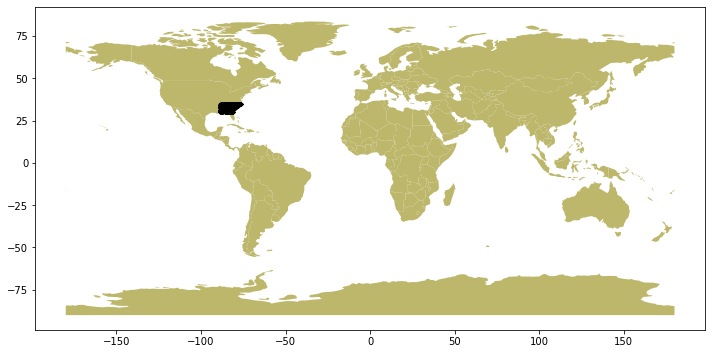

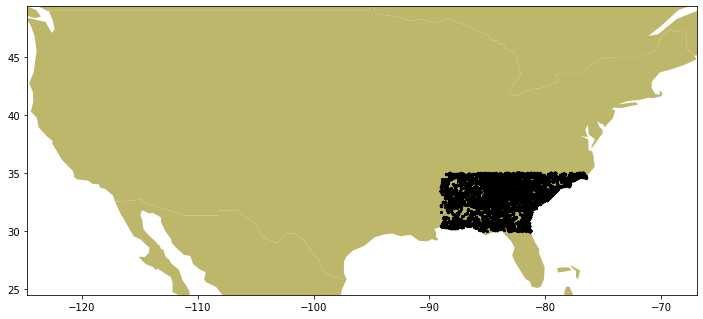

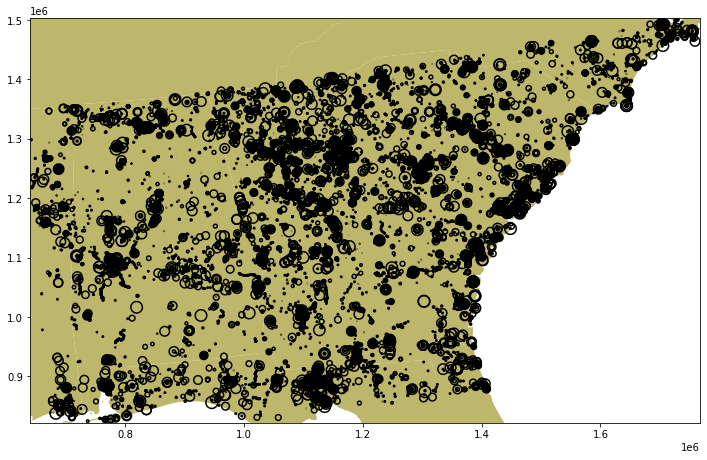

In [35]:
# Get the record coordinates as a data frame
record_coordinates = (pd.read_sql("""SELECT decimalLatitude, decimalLongitude, radius_meters
                                     FROM occurrence_records""",
                                  con=output_db_conn)
                      .astype({'decimalLongitude': 'float', 'decimalLatitude': 'float',
                               'radius_meters': 'float'}))

# Make the data frame spatial
gdf = gpd.GeoDataFrame(record_coordinates, geometry=gpd.points_from_xy(record_coordinates['decimalLongitude'],
                                                   record_coordinates['decimalLatitude']))

# Set the coordinate reference system
gdf.crs={'init' :'epsg:4326'}

# Create world map <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = world.plot(figsize=(12,12), color = 'darkkhaki')
gdf.plot(ax=base, marker='o', color='k', markersize=5)
plt.show()

# Create USA map <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
if filter_set["country"] == "US":
    usa_bbox = np.array([-124.725839,   24.498131,  -66.949895,   49.384358])
    fig, ax = plt.subplots(figsize=(12,12))
    ax.set_xlim(([usa_bbox[0],  usa_bbox[2]]))
    ax.set_ylim(([usa_bbox[1],  usa_bbox[3]]))
    world.plot(ax=ax, color='darkkhaki')
    gdf.plot(ax=ax, marker='o', color='k', markersize=5)
    plt.show()

# Create coordinate extent map <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
os.chdir(config.codeDir)
states = gpd.read_file(os.getcwd() + '/data/us_states.shp')

# Reproject states and record coordinates to facilitate buffering
states = states.to_crs(epsg=5070)
footprints = gdf.to_crs(epsg=5070)

# Buffer points for record footprints
footprints['footprint']=footprints.apply(lambda x: x.geometry.buffer(x.radius_meters), axis=1)
footprints.set_geometry(col='footprint', inplace=True, drop=True)

# Map the buffered points/footprints
fig, ax = plt.subplots(figsize=(12,12))
coordinate_bbox = footprints.geometry.total_bounds
ax.set_xlim(([coordinate_bbox[0],  coordinate_bbox[2]]))
ax.set_ylim(([coordinate_bbox[1],  coordinate_bbox[3]]))
states.plot(ax=ax, color = 'darkkhaki')
footprints.boundary.plot(ax=ax, color='k')
plt.show()

# Cleanup
del footprints, gdf

#### Years Represented

Text(0.5, 1.0, 'Occurrences per Year')

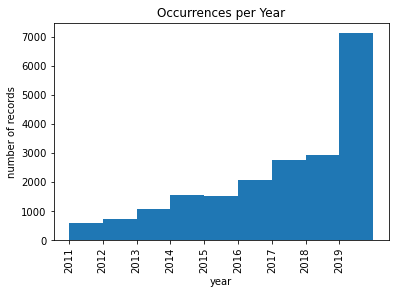

In [36]:
occ_years = [int(x[0]) for x in cursor.execute("SELECT strftime('%Y', eventDate) FROM occurrence_records").fetchall()]
years = filter_set['years_range']
years = years.split(',')
yearsrng = list(range(int(years[0]), int(years[1]), 1))
binsnum = int(years[1]) - int(years[0])
plt.hist(occ_years, bins=binsnum)
plt.ylabel("number of records")
plt.xlabel("year")
plt.xticks(yearsrng, rotation=90)
plt.title("Occurrences per Year")

#### Months Represented

Text(0.5, 1.0, 'Occurrences per Month')

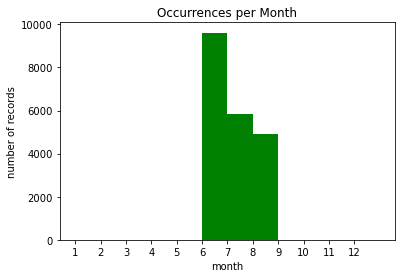

In [37]:
occ_months = [int(x[0]) for x in cursor.execute("SELECT strftime('%m', eventDate) FROM occurrence_records").fetchall()]
plt.hist(occ_months, bins=range(1, 14), color="g")
plt.ylabel("number of records")
plt.xlabel("month")
plt.xticks(range(1, 13))
plt.title("Occurrences per Month")

#### Distribution of Coordinate Uncertainty Values for Retained Records

Text(0.5, 1.0, 'Coordinate Uncertainty')

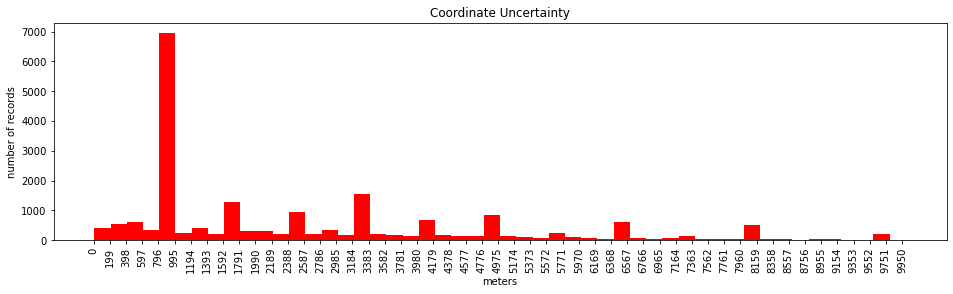

In [38]:
occ_cert = [float(x[0]) for x in cursor.execute("SELECT coordinateUncertaintyInMeters FROM occurrence_records").fetchall()]
maxi = max(occ_cert)
plt.figure(figsize=(16,4))
plt.hist(occ_cert, bins=50, color="r")
plt.xticks(range(0, int(maxi), int(maxi/50)), rotation=90)
plt.ylabel("number of records")
plt.xlabel("meters")
plt.title("Coordinate Uncertainty")

Text(0.5, 1.0, 'Coordinate Uncertainty')

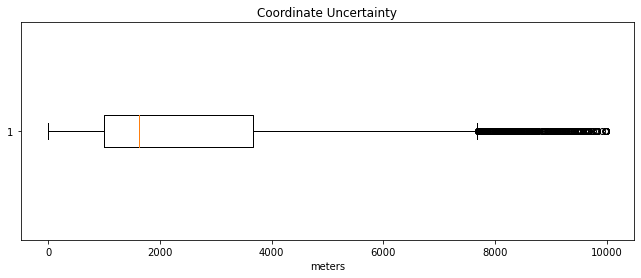

In [39]:
occ_cert = [float(x[0]) for x in cursor.execute("SELECT coordinateUncertaintyInMeters FROM occurrence_records").fetchall()]
plt.figure(figsize=(11,4))
plt.boxplot(occ_cert, vert=False)
plt.xlabel("meters")
plt.title("Coordinate Uncertainty")

Text(0.5, 1.0, 'Coordinate Uncertainties Below 2km')

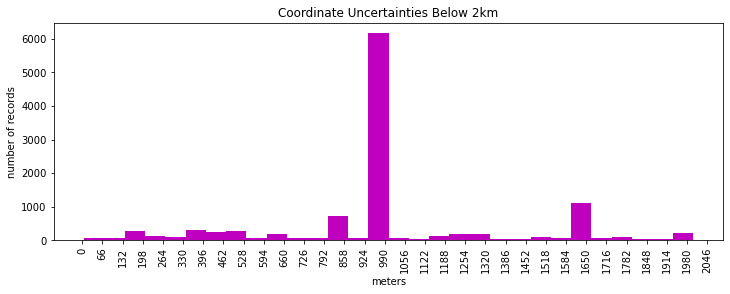

In [40]:
rng_max = 2000
occ_cert2 = [x for x in occ_cert if x <= rng_max]
plt.figure(figsize=(12,4))
plt.hist(occ_cert2, bins=30, color="m", align='mid')
plt.xticks(range(0, rng_max + 100, int(rng_max/30.)), rotation=90)
plt.ylabel("number of records")
plt.xlabel("meters")
plt.title("Coordinate Uncertainties Below 2km")

#### Remarks

In [41]:
print("General remarks:")
remarks = output_db_conn.execute("SELECT DISTINCT general_remarks FROM occurrence_records;").fetchall()
if len(remarks) <= 20:
    try:
        for rem in remarks:
            if rem[0][0:1] == ';':
                print(rem[0][2:])
            else:
                print(rem[0])
    except:
        pass
else:
    print("More than 20 remarks, consult the occurrence database.")

General remarks:
nan


In [42]:
print("Event remarks:")
remarks = output_db_conn.execute("SELECT DISTINCT eventRemarks FROM occurrence_records;").fetchall()
if len(remarks) <= 20:
    try:
        for rem in remarks:
            if rem[0][0:1] == ';':
                print(rem[0][2:])
            else:
                print(rem[0])
    except:
        pass
else:
    print("More than 20 remarks, consult the occurrence database.")

Event remarks:
More than 20 remarks, consult the occurrence database.


In [43]:
print("Occurrence remarks:")
remarks = output_db_conn.execute("SELECT DISTINCT occurrenceRemarks FROM occurrence_records;").fetchall()
if len(remarks) <= 20:
    try:
        for rem in remarks:
            if rem[0][0:1] == ';':
                print(rem[0][2:])
            else:
                print(rem[0])
    except:
        pass
else:
    print("More than 20 remarks, consult the occurrence database.")

Occurrence remarks:
nan
Need headphones to properly hear this call - it's a soft, rapid, repetitive cooing sound. In the second audio file, you'll hear a red-bellied woodpecker and my phone vibrating. This bird call is much quieter than those sounds. I believe it's a bird, but not sure. Closest match I could find is ground dove (Columbina passerina), but I think it's not that species - the call is too rapid a little different in pitch. Help - it's driving me crazy, been hearing it for weeks now. Yesterday I'm pretty sure I heard a call-and-response from two of these. Both were located near small creeks through young, mixed hardwood forest.
Adults and juveniles in trees above the Goose Overlook Observation deck
on nest
recently fledged juvenile
Window kill
Yellow-billed Cuckoo Washington County, Florida 7-15-11


In [44]:
print("Location remarks:")
remarks = output_db_conn.execute("SELECT DISTINCT locationRemarks FROM occurrence_records;").fetchall()
if len(remarks) <= 20:
    try:
        for rem in remarks:
            if rem[0][0:1] == ';':
                print(rem[0][2:])
            else:
                print(rem[0])
    except:
        pass
else:
    print("More than 20 remarks, consult the occurrence database.")

Location remarks:
nan


In [45]:
print("Identified remarks:")
remarks = output_db_conn.execute("SELECT DISTINCT general_remarks FROM occurrence_records;").fetchall()
if len(remarks) <= 20:
    try:
        for rem in remarks:
            if rem[0][0:1] == ';':
                print(rem[0][2:])
            else:
                print(rem[0])
    except:
        pass
else:
    print("More than 20 remarks, consult the occurrence database.")

Identified remarks:
nan


In [46]:
print("Georeference remarks:")
remarks = output_db_conn.execute("SELECT DISTINCT georeferenceRemarks FROM occurrence_records;").fetchall()
if len(remarks) <= 20:
    try:
        for rem in remarks:
            if rem[0][0:1] == ';':
                print(rem[0][2:])
            else:
                print(rem[0])
    except:
        pass
else:
    print("More than 20 remarks, consult the occurrence database.")

Georeference remarks:
nan


## Citations
#### eBird 

In [47]:
if ask_eBird == True:
    with open(config.EBD_file[:-22] + "recommended_citation.txt", "r") as reference:
        print(reference.readlines()[0])
else:
    print("No eBird Basic Dataset was queried")

eBird Basic Dataset. Version: EBD_relDec-2020. Cornell Lab of Ornithology, Ithaca, New York. Dec 2020.



#### GBIF

In [48]:
if ask_GBIF == True:
    if get_dwca == True:
        print("Citations-- ")
        print(cursor.execute("SELECT citations FROM GBIF_download_info").fetchall()[0][0])
    else:
        print("Set 'get_dwca' to True to acquire a list of citations")
if ask_GBIF == False:
    print("GBIF was not queried.")

Citations-- 
When using this dataset please use the following citation and pay attention to the rights documented in rights.txt:
Vellinga W (2021). Xeno-canto - Bird sounds from around the world. Xeno-canto Foundation for Nature Sounds. Occurrence dataset https://doi.org/10.15468/qv0ksn accessed via GBIF.org on 2021-04-27.
Ueda K (2021). iNaturalist Research-grade Observations. iNaturalist.org. Occurrence dataset https://doi.org/10.15468/ab3s5x accessed via GBIF.org on 2021-04-27.
Levatich T, Ligocki S (2020). EOD - eBird Observation Dataset. Cornell Lab of Ornithology. Occurrence dataset https://doi.org/10.15468/aomfnb accessed via GBIF.org on 2021-04-27.



In [49]:
if ask_GBIF == True:
    if get_dwca == True:
        print("Rights-- ")
        print(output_db_conn.execute("SELECT rights FROM GBIF_download_info").fetchall()[0][0])
    else:
        print("Set 'get_dwca' to True to see the rights")
if ask_GBIF == False:
    print("GBIF was not queried.")

Rights-- 

Dataset: Xeno-canto - Bird sounds from around the world
Rights as supplied: http://creativecommons.org/licenses/by-nc/4.0/legalcode
Dataset: iNaturalist Research-grade Observations
Rights as supplied: http://creativecommons.org/licenses/by-nc/4.0/legalcode
Dataset: EOD - eBird Observation Dataset
Rights as supplied: http://creativecommons.org/publicdomain/zero/1.0/legalcode


In [50]:
if ask_GBIF == True:
    if get_dwca == True:
        print("DOI-- ")
        doi = output_db_conn.execute("SELECT doi FROM GBIF_download_info").fetchall()[0][0]
        print("https://doi.org/" + doi)
    else:
        print("Set 'get_dwca' to True to perform a search with a doi assigned")
if ask_GBIF == False:
    print("GBIF was not queried.")

DOI-- 
https://doi.org/10.15468/dl.gg8zdm


In [51]:
if ask_GBIF == True:
    if get_dwca == True:
        print("GBIF download key-- ")
        print(output_db_conn.execute("SELECT download_key FROM GBIF_download_info").fetchall()[0][0])
    else:
        print("Set 'get_dwca' to True to perform a search with a download key assigned")
if ask_GBIF == False:
    print("GBIF was not queried")

GBIF download key-- 
0262268-200613084148143


## Runtime

In [52]:
output_db_conn.close()
del cursor
t2 = datetime.now()
print(t2 - t1)

0:28:32.603827
